接下來介紹幾個常用來處理分類問題的指標

# Accuracy Score 準確度

不免俗的要來數學阿宅的公式

$$
accuracy(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^n 1(y_i = \hat{y_i})
$$

其中的 $1( \cdot )$ 是 indicator function。 <br>

下面進入實戰環節。


In [1]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
display(accuracy_score(y_true, y_pred))

accuracy_score(y_true, y_pred, normalize=False)

0.5

2

# Top-k accuracy score 前 k 高準確度

正確的答案，只要結果在預測的前 k 高的答案裡面就算你對，可以想成給你猜 k 次，只要猜對一次就算你答對。 <br>

為了滿足數學阿宅的快樂，我們來定義新的符號 $\hat{y}_{i,j}$ 是 預測 第 $i$ 個樣本(sample)的 第 $j$ 高分數的預測，特別的來說 $\hat{y}_{i,1} = \hat{y}_i$，
下面我們就可以給公式。

$$
top-k \quad accuracy(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^k 1(y_i = \hat{y}_{i,j})
$$

下面進入實戰。



In [3]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score
y_true  = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2],
                    [0.2, 0.4, 0.3],
                    [0.7, 0.2, 0.1]])
display(top_k_accuracy_score(y_true, y_score, k=2))

top_k_accuracy_score(y_true, y_score, k=2, normalize=False)


0.75

3

# Balanced accuracy score 平衡的準確度

我們前面談的都是在資料很平衡的情況下，那如果資料很不平衡的情況下又會如何？下面舉幾個例子來感受一下。 <br>

假設你要預測的事件，是判斷起床後看見的人是不是外星人，那你大概會無腦的見人就猜他是人嗎？雖然看上去你的預測超準，但其實你根本沒學會到底要如何去判斷是地球人還是外星人，只是在瞎猜罷了，如果你今天到了 MIB 的總部，你預測的準確度恐怕就會變得奇差無比。

那在哪些狀況下可能會碰到不平衡的問題:

- 在醫學上，大部分的人都是健康的。
- 在工廠裡，大部分產品是良品。


如果你還在用之前提到的指標準確度，那你可能會搞不清預測結果的正確性，因為其實你的模型啥都沒學會，下面進入實戰。


In [4]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print('準確度: ', accuracy_score(y_true, y_pred), '平衡的準確度: ', balanced_accuracy_score(y_true, y_pred))

y_true = [0, 0, 0, 0, 0, 0, 1, 2]
y_pred = [0, 0, 0, 1, 0, 0, 1, 2]

# 1/3 + 1/3 + 5/6*1/3
balanced_accuracy_score(y_true, y_pred)


準確度:  0.9473684210526315 平衡的準確度:  0.5


0.9444444444444445

In [6]:
1/3 + 1/3 + 5/6*1/3

0.9444444444444444

In [5]:
??balanced_accuracy_score

Signature:
balanced_accuracy_score(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    adjusted=False,
)
Source:   
def balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False):
    """Compute the balanced accuracy.

    The balanced accuracy in binary and multiclass classification problems to
    deal with imbalanced datasets. It is defined as the average of recall
    obtained on each class.

    The best value is 1 and the worst value is 0 when ``adjusted=False``.

    Read more in the :ref:`User Guide <balanced_accuracy_score>`.

    .. versionadded:: 0.20

    Parameters
    ----------
    y_true : 1d array-like
        Ground truth (correct) target values.

    y_pred : 1d array-like
        Estimated targets as returned by a classifier.

    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.

    adjusted : bool, default=False
        When true, the result is adjusted for chance, so that random
        performance

#  Cohen’s kappa

這是一種觀察指標，評價 兩個觀察員 的觀察 是否一致的指標，Cohen’s kappa 的值介於 $-1$ 到 $1$ 之間，只要大於 $0.8$ 就會被認定為觀察一致，小於 $0$ 會被認為不一致，下面進入實戰。

他的公式是

$$
\frac{p_o - p_e}{1 - p_e}
$$



In [7]:
from sklearn.metrics import cohen_kappa_score

y_1 = [2, 1, 0, 2, 2, 0, 0, 1]
y_2 = [0, 2, 0, 2, 2, 0, 0, 1]

cohen_kappa_score(y_1, y_2)


0.6097560975609756

In [8]:
cohen_kappa_score(y_2, y_1)

0.6097560975609756

In [3]:
??cohen_kappa_score

Signature: cohen_kappa_score(y1, y2, *, labels=None, weights=None, sample_weight=None)
Source:   
def cohen_kappa_score(y1, y2, *, labels=None, weights=None, sample_weight=None):
    r"""Compute Cohen's kappa: a statistic that measures inter-annotator agreement.

    This function computes Cohen's kappa [1]_, a score that expresses the level
    of agreement between two annotators on a classification problem. It is
    defined as

    .. math::
        \kappa = (p_o - p_e) / (1 - p_e)

    where :math:`p_o` is the empirical probability of agreement on the label
    assigned to any sample (the observed agreement ratio), and :math:`p_e` is
    the expected agreement when both annotators assign labels randomly.
    :math:`p_e` is estimated using a per-annotator empirical prior over the
    class labels [2]_.

    Read more in the :ref:`User Guide <cohen_kappa>`.

    Parameters
    ----------
    y1 : array of shape (n_samples,)
        Labels assigned by the first annotator.

    y2 : ar

# Accuracy 準確率、 Precision 精確率、 Recall 召回率、 F-score


為了要解釋這些概念，我們來個二分類的看病問題例子，


|  真實 \  預測 | **有病** （<font color=Blue>positive</font>） | **沒病** （negative） |
| :-----: | :----: | :----: |
| **有病** | TP （true <font color=Blue>positive</font>） <br> 判斷是對的 有病 | FN （<font color=Red>false</font> negative） <br> 判斷是錯的 沒病 |
| **沒病** | FP （<font color=Red>false</font> <font color=Blue>positive</font>） <br> 判斷是錯的 有病 | TN （true negative） <br> 判斷是對的 沒有病 |


在統計上我們有一些其他的稱呼，

### FP （false positive） : 偽陽，型一錯誤
### FN （false negative） : 偽陰，型二錯誤

我們下面用這些新概念來解釋

## Accuracy 準確率

$$
Accuracy = \frac{TP+TN}{TP+FN+FP+TN}
$$

## Precision 精確率

$$
Precision = \frac{TP}{TP + FP}
$$


## Recall 召回率

$$
Recall = \frac{TP}{TP+FN}
$$


## F-score


$$
f = 1 / \Big (\frac{\frac{1}{Precision} + \frac{1}{Recall}}{2} \Big)
$$


下面進入實戰。


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = [0, 2, 1, 0, 0, 1]

display(precision_score(y_true, y_pred, average='macro'))
# if imbalance
display(precision_score(y_true, y_pred, average='micro'))

display(recall_score(y_true, y_pred, average='macro'))
# if imbalance
display(recall_score(y_true, y_pred, average='micro'))

display(f1_score(y_true, y_pred, average='macro'))
# if imbalance
display(f1_score(y_true, y_pred, average='micro'))


0.2222222222222222

0.3333333333333333

0.3333333333333333

0.3333333333333333

0.26666666666666666

0.3333333333333333

In [16]:
# 一次算每個類別 precision, recall, f_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])

display(precision_recall_fscore_support(y_true, y_pred, average='macro'))

display(precision_recall_fscore_support(y_true, y_pred, average='micro'))


(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333, None)

# Confusion Matrix

如果我們想要一次比較多個類別，就需要 Confusion Matrix 。



array([[2, 0, 0],
       [1, 0, 1],
       [0, 2, 0]], dtype=int64)

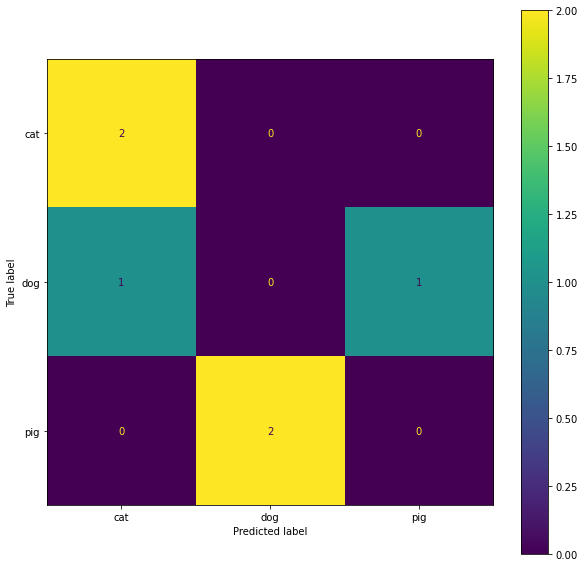

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

# y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
# y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
y_true = np.array([0, 1, 2, 0, 1, 2])
y_pred = np.array([0, 2, 1, 0, 0, 1])
target_names = ['cat', 'dog', 'pig']

cm = confusion_matrix(y_true, y_pred)

display(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()



# Classification Report

也可以直接讓 scikit learn 做報告。


In [22]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['cat', 'dog', 'pig']

print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

         cat       0.67      1.00      0.80         2
         dog       0.00      0.00      0.00         1
         pig       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



這邊要特別說明一下 Macro Average 跟 Weighted Average。

# Macro Average

他就是每一類的平均，以上面的 precision 為例

$$
\frac{0.67+0+1}{3} \sim 0.56
$$

# Weighted Average

他就是每一類的加權平均，以上面的 precision 為例

$$
\frac{2}{5} * 0.67 + \frac{1}{5} * 0 + \frac{2}{5} * 1  \sim 0.67
$$

